In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [150]:
from sklearn.datasets import make_regression
X,y= make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

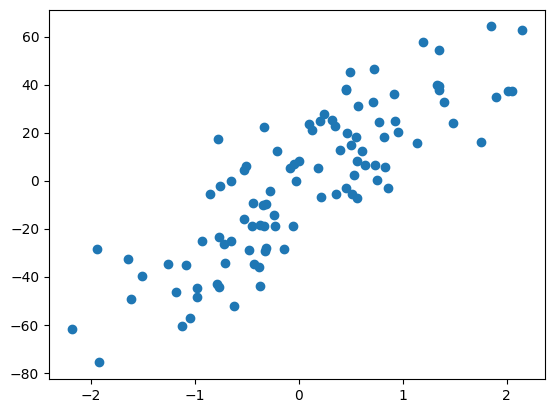

In [152]:
plt.scatter(X,y)

# Linear Regression

In [153]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train,y_train)
print(lreg.intercept_)
print(lreg.coef_)

-2.7130725669241036
[28.16404017]


# Lasso Regression

C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.078e+04, tolerance: 7.701e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

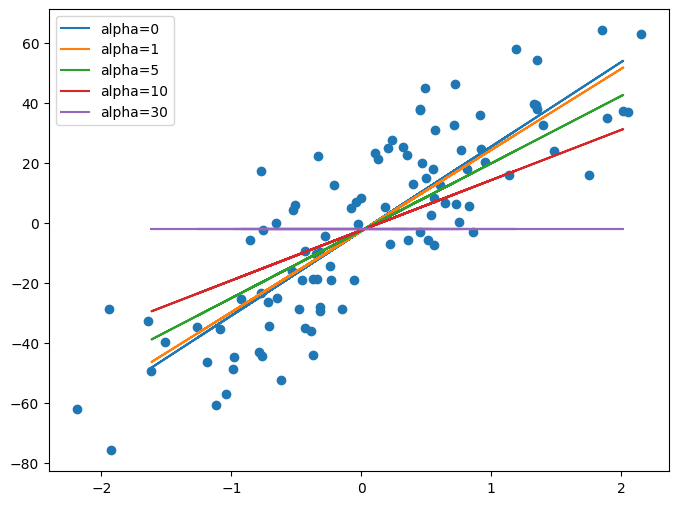

In [154]:
from sklearn.linear_model import Lasso

alphas=[0,1,5,10,30]
plt.figure(figsize=(8,6))
plt.scatter(X,y)

for i in alphas:
  reg = Lasso(alpha=i)
  reg.fit(X_train,y_train)
  plt.plot(X_test, reg.predict(X_test), label=f'alpha={i}')
plt.legend()
plt.show()

# Generating Non linear data

In [155]:
m = 100
x1 = 5*np.random.rand(m,1) - 2
x2 = 0.7 * x1**2 - 2 * x1 + 3 + np.random.randn(m,1)

In [156]:
x1.shape

(100, 1)

In [157]:
# x1.ravel()
x1

array([[ 0.84576149],
       [ 0.32313627],
       [-0.07480185],
       [-0.18126582],
       [ 2.47147707],
       [ 0.44143949],
       [-0.99733613],
       [ 0.0554592 ],
       [ 1.17699438],
       [ 0.36514982],
       [ 0.35838702],
       [-0.91970213],
       [ 0.01861212],
       [ 0.59453694],
       [-1.17512996],
       [-0.57469766],
       [-1.71226557],
       [-0.93478157],
       [ 1.87992226],
       [ 2.77357686],
       [ 2.45988297],
       [-1.81843113],
       [ 1.32926408],
       [-1.12593404],
       [ 2.52299629],
       [ 1.76150313],
       [ 0.67824938],
       [ 2.15962274],
       [-1.40880008],
       [-0.25471648],
       [ 0.81192176],
       [ 1.04241104],
       [ 1.75505909],
       [-1.72535545],
       [-1.59093689],
       [ 1.6058267 ],
       [ 2.67251529],
       [-0.57844056],
       [-1.33058732],
       [ 1.66533122],
       [-0.99765309],
       [ 2.18720011],
       [ 1.73282053],
       [-1.83926047],
       [ 2.86958031],
       [ 2

In [158]:
# x2.ravel()

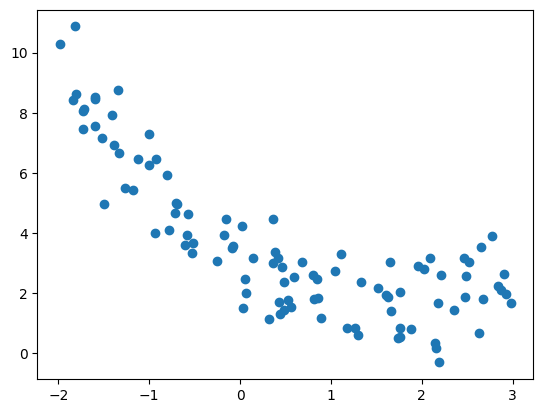

In [159]:
plt.scatter(x1,x2)
plt.show()

# Lasso Reg for different values of alpha

C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Acer1\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.255e+01, tolerance: 6.088e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

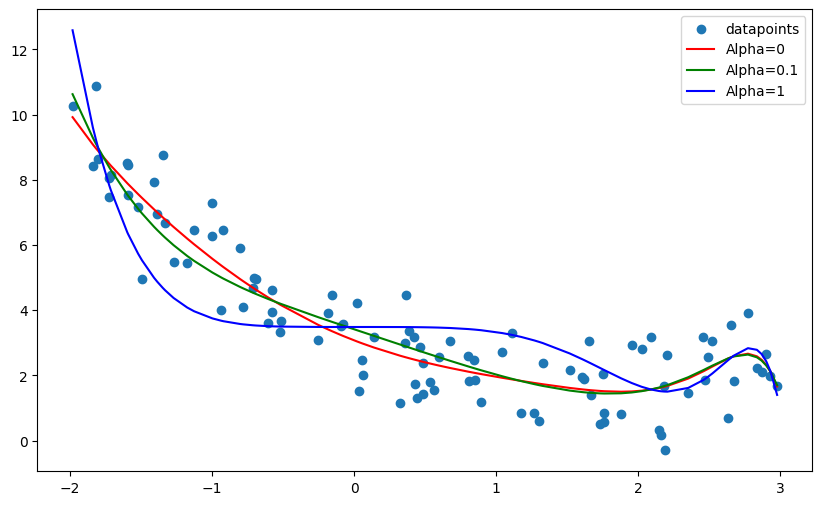

In [160]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso

def get_preds_lasso(x1,x2,alpha):
  model = Pipeline([
                    ('poly', PolynomialFeatures(degree=16)),
                    ('lasso',Lasso(alpha=alpha))
                  ])
  model.fit(x1,x2)
  return model.predict(x1)

alphas = [0,0.1,1]
cs = ['r','g','b']
plt.figure(figsize=(10,6))
plt.scatter(x1,x2, label='datapoints')
for alpha,c in zip(alphas,cs):
  preds = get_preds_lasso(x1,x2,alpha=alpha)
  plt.plot(sorted(x1[:,0]) , preds[np.argsort(x1[:,0])] , c ,label=f'Alpha={alpha}')
  # plt.plot(sorted(x1.ravel()) , preds[np.argsort(x1.ravel())] , c ,label=f'Alpha={alpha}')

plt.legend()
plt.show()